In [1]:
import pandas as pd
import numpy as np
import scipy
import sympy
from sympy.solvers import solve
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%pylab nbagg
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['draw_if_interactive', 'new_figure_manager', 'solve']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#x and y coordinates of the stars
x = np.array([970.794,976.214,976.214,976.214,927.429,927.429,927.429,927.429,932.849,927.429,932.849,932.849,932.849,932.849,932.849,932.849,938.270,938.270,938.270,938.270,938.27,943.690,943.690,943.690,949.111,949.111,949.111,949.111,949.111,949.111,954.532,954.532,954.532,954.532,954.532,959.952,959.952,959.952,954.532,954.532,954.532,959.952,959.952,954.532,954.532,959.952,959.952,959.952,959.952,959.952,959.952,959.952,959.952,959.952,965.373,965.373,965.373,965.373,965.373,970.794,970.794,970.794,970.794,970.794])
y = np.array([699.762,699.762,699.762,699.762,721.444,726.865,721.444,721.444,721.444,726.865,726.865,721.444,721.444,721.444,726.865,721.444,721.444,721.444,721.444,721.444,721.444,721.444,721.444,721.444,721.444,726.865,721.865,721.444,726.865,721.444,721.444,721.444,721.444,721.444,721.444,721.444,721.444,721.444,705.183,705.183,699.762,705.183,705.183,705.183,705.183,699.762,705.183,705.183,705.183,705.183,705.183,705.183,705.183,705.183,699.762,699.762,699.762,699.762,699.762,699.762,699.762,699.762,699.762,699.762])

#Calculating mean and standard deviation for the above data
xstd = np.std(x)
ystd = np.std(y)

xmean = np.mean(x)
ymean = np.mean(y)

print("The deviation in x values is:",xstd)
print("The deviation in y values is:",ystd)
print("The mean in x values is:",xmean)
print("The mean in y values is:",ymean)

The deviation in x values is: 13.975799894152628
The deviation in y values is: 10.320274936047749
The mean in x values is: 952.329578125
The mean in y values is: 712.9812031249999


In [3]:
#Printing out the values to double check
for n in range(0,64):
    print(x[n],",",y[n])

970.794 , 699.762
976.214 , 699.762
976.214 , 699.762
976.214 , 699.762
927.429 , 721.444
927.429 , 726.865
927.429 , 721.444
927.429 , 721.444
932.849 , 721.444
927.429 , 726.865
932.849 , 726.865
932.849 , 721.444
932.849 , 721.444
932.849 , 721.444
932.849 , 726.865
932.849 , 721.444
938.27 , 721.444
938.27 , 721.444
938.27 , 721.444
938.27 , 721.444
938.27 , 721.444
943.69 , 721.444
943.69 , 721.444
943.69 , 721.444
949.111 , 721.444
949.111 , 726.865
949.111 , 721.865
949.111 , 721.444
949.111 , 726.865
949.111 , 721.444
954.532 , 721.444
954.532 , 721.444
954.532 , 721.444
954.532 , 721.444
954.532 , 721.444
959.952 , 721.444
959.952 , 721.444
959.952 , 721.444
954.532 , 705.183
954.532 , 705.183
954.532 , 699.762
959.952 , 705.183
959.952 , 705.183
954.532 , 705.183
954.532 , 705.183
959.952 , 699.762
959.952 , 705.183
959.952 , 705.183
959.952 , 705.183
959.952 , 705.183
959.952 , 705.183
959.952 , 705.183
959.952 , 705.183
959.952 , 705.183
965.373 , 699.762
965.373 , 699.762


In [4]:
#Checking the length of x = length of y for further calculations
len(x)==len(y)

True

In [5]:
#Reading data for stars and assigning variables for each column
star1       = np.loadtxt("star1.txt"[:])
star1sum6   = star1[:,0]
star1sum12  = star1[:,1]
star1sum18  = star1[:,2]
star1sum22  = star1[:,3]
star1sum26  = star1[:,4]
star1msky   = star1[:,10]
star1flux6  = star1[:,11]
star1flux12 = star1[:,12]
star1flux18 = star1[:,13]
star1flux22 = star1[:,14]
star1flux26 = star1[:,15]

star2       = np.loadtxt("star2.txt"[:])
star2sum6   = star2[:,0]
star2sum12  = star2[:,1]
star2sum18  = star2[:,2]
star2sum22  = star2[:,3]
star2sum26  = star2[:,4]
star2msky   = star2[:,10]
star2flux6  = star2[:,11]
star2flux12 = star2[:,12]
star2flux18 = star2[:,13]
star2flux22 = star2[:,14]
star2flux26 = star2[:,15]

star3       = np.loadtxt("star3.txt"[:])
star3sum6   = star3[:,0]
star3sum12  = star3[:,1]
star3sum18  = star3[:,2]
star3sum22  = star3[:,3]
star3sum26  = star3[:,4]
star3msky   = star3[:,10]
star3flux6  = star3[:,11]
star3flux12 = star3[:,12]
star3flux18 = star3[:,13]
star3flux22 = star3[:,14]
star3flux26 = star3[:,15]

star4       = np.loadtxt("star4.txt"[:])
star4sum6   = star4[:,0]
star4sum12  = star4[:,1]
star4sum18  = star4[:,2]
star4sum22  = star4[:,3]
star4sum26  = star4[:,4]
star4msky   = star4[:,10]
star4flux6  = star4[:,11]
star4flux12 = star4[:,12]
star4flux18 = star4[:,13]
star4flux22 = star4[:,14]
star4flux26 = star4[:,15]

star5       = np.loadtxt("star5.txt"[:])
star5sum6   = star5[:,0]
star5sum12  = star5[:,1]
star5sum18  = star5[:,2]
star5sum22  = star5[:,3]
star5sum26  = star5[:,4]
star5msky   = star5[:,10]
star5flux6  = star5[:,11]
star5flux12 = star5[:,12]
star5flux18 = star5[:,13]
star5flux22 = star5[:,14]
star5flux26 = star5[:,15]

star6       = np.loadtxt("star6.txt"[:])
star6sum6   = star6[:,0]
star6sum12  = star6[:,1]
star6sum18  = star6[:,2]
star6sum22  = star6[:,3]
star6sum26  = star6[:,4]
star6msky   = star6[:,10]
star6flux6  = star6[:,11]
star6flux12 = star6[:,12]
star6flux18 = star6[:,13]
star6flux22 = star6[:,14]
star6flux26 = star6[:,15]

star7       = np.loadtxt("star7.txt"[:])
star7sum6   = star7[:,0]
star7sum12  = star7[:,1]
star7sum18  = star7[:,2]
star7sum22  = star7[:,3]
star7sum26  = star7[:,4]
star7msky   = star7[:,10]
star7flux6  = star7[:,11]
star7flux12 = star7[:,12]
star7flux18 = star7[:,13]
star7flux22 = star7[:,14]
star7flux26 = star7[:,15]

star8       = np.loadtxt("star8.txt"[:])
star8sum6   = star8[:,0]
star8sum12  = star8[:,1]
star8sum18  = star8[:,2]
star8sum22  = star8[:,3]
star8sum26  = star8[:,4]
star8msky   = star8[:,10]
star8flux6  = star8[:,11]
star8flux12 = star8[:,12]
star8flux18 = star8[:,13]
star8flux22 = star8[:,14]
star8flux26 = star8[:,15]

star9       = np.loadtxt("star9.txt"[:])
star9sum6   = star9[:,0]
star9sum12  = star9[:,1]
star9sum18  = star9[:,2]
star9sum22  = star9[:,3]
star9sum26  = star9[:,4]
star9msky   = star9[:,10]
star9flux6  = star9[:,11]
star9flux12 = star9[:,12]
star9flux18 = star9[:,13]
star9lux22  = star9[:,14]
star9lux26  = star9[:,15]

star10       = np.loadtxt("star10.txt"[:])
star10sum6   = star10[:,0]
star10sum12  = star10[:,1]
star10sum18  = star10[:,2]
star10sum22  = star10[:,3]
star10sum26  = star10[:,4]
star10msky   = star10[:,10]
star10flux6  = star10[:,11]
star10flux12 = star10[:,12]
star10flux18 = star10[:,13]
star10flux22 = star10[:,14]
star10flux26 = star10[:,15]

star11       = np.loadtxt("star11.txt"[:])
star11sum6   = star11[:,0]
star11sum12  = star11[:,1]
star11sum18  = star11[:,2]
star11sum22  = star11[:,3]
star11sum26  = star11[:,4]
star11msky   = star11[:,10]
star11flux6  = star11[:,11]
star11flux12 = star11[:,12]
star11flux18 = star11[:,13]
star11flux22 = star11[:,14]
star11flux26 = star11[:,15]

star12       = np.loadtxt("star12.txt"[:])
star12sum6   = star12[:,0]
star12sum12  = star12[:,1]
star12sum18  = star12[:,2]
star12sum22  = star12[:,3]
star12sum26  = star12[:,4]
star12msky   = star12[:,10]
star12flux6  = star12[:,11]
star12flux12 = star12[:,12]
star12flux18 = star12[:,13]
star12flux22 = star12[:,14]
star12flux26 = star12[:,15]

star13       = np.loadtxt("star13.txt"[:])
star13sum6   = star13[:,0]
star13sum12  = star13[:,1]
star13sum18  = star13[:,2]
star13sum22  = star13[:,3]
star13sum26  = star13[:,4]
star13msky   = star13[:,10]
star13flux6  = star13[:,11]
star13flux12 = star13[:,12]
star13flux18 = star13[:,13]
star13flux22 = star13[:,14]
star13flux26 = star13[:,15]

star14       = np.loadtxt("star14.txt"[:])
star14sum6   = star14[:,0]
star14sum12  = star14[:,1]
star14sum18  = star14[:,2]
star14sum22  = star14[:,3]
star14sum26  = star14[:,4]
star14msky   = star14[:,10]
star14flux6  = star14[:,11]
star14flux12 = star14[:,12]
star14flux18 = star14[:,13]
star14flux22 = star14[:,14]
star14flux26 = star14[:,15]

star15       = np.loadtxt("star15.txt"[:])
star15sum6   = star15[:,0]
star15sum12  = star15[:,1]
star15sum18  = star15[:,2]
star15sum22  = star15[:,3]
star15sum26  = star15[:,4]
star15msky   = star15[:,10]
star15flux6  = star15[:,11]
star15flux12 = star15[:,12]
star15flux18 = star15[:,13]
star15flux22 = star15[:,14]
star15flux26 = star15[:,15]

star16       = np.loadtxt("star16.txt"[:])
star16sum6   = star16[:,0]
star16sum12  = star16[:,1]
star16sum18  = star16[:,2]
star16sum22  = star16[:,3]
star16sum26  = star16[:,4]
star16msky   = star16[:,10]
star16flux6  = star16[:,11]
star16flux12 = star16[:,12]
star16flux18 = star16[:,13]
star16flux22 = star16[:,14]
star16flux26 = star16[:,15]

star17       = np.loadtxt("star17.txt"[:])
star17sum6   = star17[:,0]
star17sum12  = star17[:,1]
star17sum18  = star17[:,2]
star17sum22  = star17[:,3]
star17sum26  = star17[:,4]
star17msky   = star17[:,10]
star17flux6  = star17[:,11]
star17flux12 = star17[:,12]
star17flux18 = star17[:,13]
star17flux22 = star17[:,14]
star17flux26 = star17[:,15]

star18       = np.loadtxt("star18.txt"[:])
star18sum6   = star18[:,0]
star18sum12  = star18[:,1]
star18sum18  = star18[:,2]
star18sum22  = star18[:,3]
star18sum26  = star18[:,4]
star18msky   = star18[:,10]
star18flux6  = star18[:,11]
star18flux12 = star18[:,12]
star18flux18 = star18[:,13]
star18flux22 = star18[:,14]
star18flux26 = star18[:,15]

star19       = np.loadtxt("star19.txt"[:])
star19sum6   = star19[:,0]
star19sum12  = star19[:,1]
star19sum18  = star19[:,2]
star19sum22  = star19[:,3]
star19sum26  = star19[:,4]
star19msky   = star19[:,10]
star19flux6  = star19[:,11]
star19flux12 = star19[:,12]
star19flux18 = star19[:,13]
star19flux22 = star19[:,14]
star19flux26 = star19[:,15]

star20       = np.loadtxt("star20.txt"[:])
star20sum6   = star20[:,0]
star20sum12  = star20[:,1]
star20sum18  = star20[:,2]
star20sum22  = star20[:,3]
star20sum26  = star20[:,4]
star20msky   = star20[:,10]
star20flux6  = star20[:,11]
star20flux12 = star20[:,12]
star20flux18 = star20[:,13]
star20flux22 = star20[:,14]
star20flux26 = star20[:,15]

star21       = np.loadtxt("star21.txt"[:])
star21sum6   = star21[:,0]
star21sum12  = star21[:,1]
star21sum18  = star21[:,2]
star21sum22  = star21[:,3]
star21sum26  = star21[:,4]
star21msky   = star21[:,10]
star21flux6  = star21[:,11]
star21flux12 = star21[:,12]
star21flux18 = star21[:,13]
star21flux22 = star21[:,14]
star21flux26 = star21[:,15]

star22       = np.loadtxt("star22.txt"[:])
star22sum6   = star22[:,0]
star22sum12  = star22[:,1]
star22sum18  = star22[:,2]
star22sum22  = star22[:,3]
star22sum26  = star22[:,4]
star22msky   = star22[:,10]
star22flux6  = star22[:,11]
star22flux12 = star22[:,12]
star22flux18 = star22[:,13]
star22flux22 = star22[:,14]
star22flux26 = star22[:,15]

star23       = np.loadtxt("star23.txt"[:])
star23sum6   = star23[:,0]
star23sum12  = star23[:,1]
star23sum18  = star23[:,2]
star23sum22  = star23[:,3]
star23sum26  = star23[:,4]
star23msky   = star23[:,10]
star23flux6  = star23[:,11]
star23flux12 = star23[:,12]
star23flux18 = star23[:,13]
star23flux22 = star23[:,14]
star23flux26 = star23[:,15]

star24       = np.loadtxt("star24.txt"[:])
star24sum6   = star24[:,0]
star24sum12  = star24[:,1]
star24sum18  = star24[:,2]
star24sum22  = star24[:,3]
star24sum26  = star24[:,4]
star24msky   = star24[:,10]
star24flux6  = star24[:,11]
star24flux12 = star24[:,12]
star24flux18 = star24[:,13]
star24flux22 = star24[:,14]
star24flux26 = star24[:,15]

star25       = np.loadtxt("star25.txt"[:])
star25sum6   = star25[:,0]
star25sum12  = star25[:,1]
star25sum18  = star25[:,2]
star25sum22  = star25[:,3]
star25sum26  = star25[:,4]
star25msky   = star25[:,10]
star25flux6  = star25[:,11]
star25flux12 = star25[:,12]
star25flux18 = star25[:,13]
star25flux22 = star25[:,14]
star25flux26 = star25[:,15]

In [6]:
#Calculating mean and standard deviations for aperture sizes, msky, and fluxes
meansum6 = (np.mean(star1sum6),np.mean(star2sum6),np.mean(star3sum6),np.mean(star4sum6),np.mean(star5sum6),np.mean(star6sum6),np.mean(star7sum6),np.mean(star8sum6),np.mean(star9sum6),np.mean(star10sum6),np.mean(star11sum6),np.mean(star12sum6),np.mean(star13sum6),np.mean(star14sum6),np.mean(star15sum6),np.mean(star16sum6),np.mean(star17sum6),np.mean(star18sum6),np.mean(star19sum6),np.mean(star20sum6),np.mean(star21sum6),np.mean(star22sum6),np.mean(star23sum6),np.mean(star24sum6),np.mean(star25sum6))
stdsum6  = (np.std(star1sum6),np.std(star2sum6),np.std(star3sum6),np.std(star4sum6),np.std(star5sum6),np.std(star6sum6),np.std(star7sum6),np.std(star8sum6),np.std(star9sum6),np.std(star10sum6),np.std(star11sum6),np.std(star12sum6),np.std(star13sum6),np.std(star14sum6),np.std(star15sum6),np.std(star16sum6),np.std(star17sum6),np.std(star18sum6),np.std(star19sum6),np.std(star20sum6),np.std(star21sum6),np.std(star22sum6),np.std(star23sum6),np.std(star24sum6),np.std(star25sum6))

meansum12 = (np.mean(star1sum12),np.mean(star2sum12),np.mean(star3sum12),np.mean(star4sum12),np.mean(star5sum12),np.mean(star6sum12),np.mean(star7sum12),np.mean(star8sum12),np.mean(star9sum12),np.mean(star10sum12),np.mean(star11sum12),np.mean(star12sum12),np.mean(star13sum12),np.mean(star14sum12),np.mean(star15sum12),np.mean(star16sum12),np.mean(star17sum12),np.mean(star18sum12),np.mean(star19sum12),np.mean(star20sum12),np.mean(star21sum12),np.mean(star22sum12),np.mean(star23sum12),np.mean(star24sum12),np.mean(star25sum12))
stdsum12  = (np.std(star1sum12),np.std(star2sum12),np.std(star3sum12),np.std(star4sum12),np.std(star5sum12),np.std(star6sum12),np.std(star7sum12),np.std(star8sum12),np.std(star9sum12),np.std(star10sum12),np.std(star11sum12),np.std(star12sum12),np.std(star13sum12),np.std(star14sum12),np.std(star15sum12),np.std(star16sum12),np.std(star17sum12),np.std(star18sum12),np.std(star19sum12),np.std(star20sum12),np.std(star21sum12),np.std(star22sum12),np.std(star23sum12),np.std(star24sum12),np.std(star25sum12))

meansum18 = (np.mean(star1sum18),np.mean(star2sum18),np.mean(star3sum18),np.mean(star4sum18),np.mean(star5sum18),np.mean(star6sum18),np.mean(star7sum18),np.mean(star8sum18),np.mean(star9sum18),np.mean(star10sum18),np.mean(star11sum18),np.mean(star12sum18),np.mean(star13sum18),np.mean(star14sum18),np.mean(star15sum18),np.mean(star16sum18),np.mean(star17sum18),np.mean(star18sum18),np.mean(star19sum18),np.mean(star20sum18),np.mean(star21sum18),np.mean(star22sum18),np.mean(star23sum18),np.mean(star24sum18),np.mean(star25sum18))
stdsum18  = (np.std(star1sum18),np.std(star2sum18),np.std(star3sum18),np.std(star4sum18),np.std(star5sum18),np.std(star6sum18),np.std(star7sum18),np.std(star8sum18),np.std(star9sum18),np.std(star10sum18),np.std(star11sum18),np.std(star12sum18),np.std(star13sum18),np.std(star14sum18),np.std(star15sum18),np.std(star16sum18),np.std(star17sum18),np.std(star18sum18),np.std(star19sum18),np.std(star20sum18),np.std(star21sum18),np.std(star22sum18),np.std(star23sum18),np.std(star24sum18),np.std(star25sum18))
             
meansum22 = (np.mean(star1sum22),np.mean(star2sum22),np.mean(star3sum22),np.mean(star4sum22),np.mean(star5sum22),np.mean(star6sum22),np.mean(star7sum22),np.mean(star8sum22),np.mean(star9sum22),np.mean(star10sum22),np.mean(star11sum22),np.mean(star12sum22),np.mean(star13sum22),np.mean(star14sum22),np.mean(star15sum22),np.mean(star16sum22),np.mean(star17sum22),np.mean(star18sum22),np.mean(star19sum22),np.mean(star20sum22),np.mean(star21sum22),np.mean(star22sum22),np.mean(star23sum22),np.mean(star24sum22),np.mean(star25sum22))
stdsum22  = (np.std(star1sum22),np.std(star2sum22),np.std(star3sum22),np.std(star4sum22),np.std(star5sum22),np.std(star6sum22),np.std(star7sum22),np.std(star8sum22),np.std(star9sum22),np.std(star10sum22),np.std(star11sum22),np.std(star12sum22),np.std(star13sum22),np.std(star14sum22),np.std(star15sum22),np.std(star16sum22),np.std(star17sum22),np.std(star18sum22),np.std(star19sum22),np.std(star20sum22),np.std(star21sum22),np.std(star22sum22),np.std(star23sum22),np.std(star24sum22),np.std(star25sum22))
             
meansum26 = (np.mean(star1sum26),np.mean(star2sum26),np.mean(star3sum26),np.mean(star4sum26),np.mean(star5sum26),np.mean(star6sum26),np.mean(star7sum26),np.mean(star8sum26),np.mean(star9sum26),np.mean(star10sum26),np.mean(star11sum26),np.mean(star12sum26),np.mean(star13sum26),np.mean(star14sum26),np.mean(star15sum26),np.mean(star16sum26),np.mean(star17sum26),np.mean(star18sum26),np.mean(star19sum26),np.mean(star20sum26),np.mean(star21sum26),np.mean(star22sum26),np.mean(star23sum26),np.mean(star24sum26),np.mean(star25sum26))
stdsum26  = (np.std(star1sum26),np.std(star2sum26),np.std(star3sum26),np.std(star4sum26),np.std(star5sum26),np.std(star6sum26),np.std(star7sum26),np.std(star8sum26),np.std(star9sum26),np.std(star10sum26),np.std(star11sum26),np.std(star12sum26),np.std(star13sum26),np.std(star14sum26),np.std(star15sum26),np.std(star16sum26),np.std(star17sum26),np.std(star18sum12),np.std(star19sum26),np.std(star20sum26),np.std(star21sum26),np.std(star22sum26),np.std(star23sum26),np.std(star24sum26),np.std(star25sum26))
             
meanmsky = (np.mean(star1msky),np.mean(star2msky),np.mean(star3msky),np.mean(star4msky),np.mean(star4msky),np.mean(star5msky),np.mean(star6msky),np.mean(star7msky),np.mean(star8msky),np.mean(star9msky),np.mean(star10msky),np.mean(star11msky),np.mean(star12msky),np.mean(star13msky),np.mean(star14msky),np.mean(star15msky),np.mean(star16msky),np.mean(star17msky),np.mean(star18msky),np.mean(star19msky),np.mean(star20msky),np.mean(star21msky),np.mean(star22msky),np.mean(star23msky),np.mean(star24msky),np.mean(star25msky))
stdmsky  = (np.std(star1msky),np.std(star2msky),np.std(star3msky),np.std(star4msky),np.std(star5msky),np.std(star5msky),np.std(star6msky),np.std(star7msky),np.std(star8msky),np.std(star9msky),np.std(star10msky),np.std(star11msky),np.std(star12msky),np.std(star13msky),np.std(star14msky),np.std(star15msky),np.std(star16msky),np.std(star17msky),np.std(star18msky),np.std(star19msky),np.std(star20msky),np.std(star21msky),np.std(star22msky),np.std(star23msky),np.std(star24msky),np.std(star25msky))
            
meanflux6 = (np.mean(star1flux6),np.mean(star2flux6),np.mean(star3flux6),np.mean(star4flux6),np.mean(star5flux6),np.mean(star6flux6),np.mean(star7flux6),np.mean(star8flux6),np.mean(star9flux6),np.mean(star10flux6),np.mean(star11flux6),np.mean(star12flux6),np.mean(star13flux6),np.mean(star14flux6),np.mean(star15flux6),np.mean(star16flux6),np.mean(star17flux6),np.mean(star18flux6),np.mean(star19flux6),np.mean(star20flux6),np.mean(star21flux6),np.mean(star22flux6),np.mean(star23flux6),np.mean(star24flux6),np.mean(star25flux6))
stdflux6  = (np.std(star1flux6),np.std(star2flux6),np.std(star3flux6),np.std(star4flux6),np.std(star5flux6),np.std(star6flux6),np.std(star7flux6),np.std(star8flux6),np.std(star9flux6),np.std(star10flux6),np.std(star11flux6),np.std(star12flux6),np.std(star13flux6),np.std(star14flux6),np.std(star15flux6),np.std(star16flux6),np.std(star17flux6),np.std(star18flux6),np.std(star19flux6),np.std(star20flux6),np.std(star21flux6),np.std(star22flux6),np.std(star23flux6),np.std(star24flux6),np.std(star25flux6))

meanflux12 = (np.mean(star1flux12),np.mean(star2flux12),np.mean(star3flux12),np.mean(star4flux12),np.mean(star5flux12),np.mean(star6flux12),np.mean(star7flux12),np.mean(star8flux12),np.mean(star9flux12),np.mean(star10flux12),np.mean(star11flux12),np.mean(star12flux12),np.mean(star13flux12),np.mean(star14flux12),np.mean(star15flux12),np.mean(star16flux12),np.mean(star17flux12),np.mean(star18flux12),np.mean(star19flux12),np.mean(star20flux12),np.mean(star21flux12),np.mean(star22flux12),np.mean(star23flux12),np.mean(star24flux12),np.mean(star25flux12))
stdflux12  = (np.std(star2flux12),np.std(star2flux12),np.std(star3flux12),np.std(star4flux12),np.std(star5flux12),np.std(star6flux12),np.std(star7flux12),np.std(star8flux12),np.std(star9flux12),np.std(star10flux12),np.std(star11flux12),np.std(star12flux12),np.std(star13flux12),np.std(star14flux12),np.std(star15flux12),np.std(star16flux12),np.std(star17flux12),np.std(star18flux12),np.std(star19flux12),np.std(star20flux12),np.mean(star21flux12),np.mean(star22flux12),np.std(star23flux12),np.std(star24flux12),np.std(star25flux12))
              
meanflux18 = (np.mean(star1flux18),np.mean(star2flux18),np.mean(star3flux18),np.mean(star4flux18),np.mean(star5flux18),np.mean(star6flux18),np.mean(star7flux18),np.mean(star8flux18),np.mean(star9flux18),np.mean(star10flux18),np.mean(star11flux18),np.mean(star12flux18),np.mean(star13flux18),np.mean(star14flux18),np.mean(star15flux18),np.mean(star16flux18),np.mean(star17flux18),np.mean(star18flux18),np.mean(star19flux18),np.mean(star20flux18),np.mean(star21flux18),np.mean(star22flux18),np.mean(star23flux18),np.mean(star24flux18),np.mean(star25flux18))
stdflux18  = (np.std(star2flux18),np.std(star2flux18),np.std(star3flux18),np.std(star4flux18),np.std(star5flux18),np.std(star6flux18),np.std(star7flux18),np.std(star8flux18),np.std(star9flux18),np.std(star10flux18),np.std(star11flux18),np.std(star12flux18),np.std(star13flux18),np.std(star14flux18),np.std(star15flux18),np.std(star16flux18),np.std(star17flux18),np.std(star18flux18),np.std(star19flux18),np.std(star20flux18),np.mean(star21flux18),np.mean(star22flux18),np.std(star23flux18),np.std(star24flux18),np.std(star25flux18))

meanflux22 = (np.mean(star1flux22),np.mean(star2flux22),np.mean(star3flux22),np.mean(star4flux22),np.mean(star5flux22),np.mean(star6flux22),np.mean(star7flux22),np.mean(star8flux22),np.mean(star10flux22),np.mean(star11flux22),np.mean(star12flux22),np.mean(star13flux22),np.mean(star14flux22),np.mean(star15flux22),np.mean(star16flux22),np.mean(star17flux22),np.mean(star18flux22),np.mean(star19flux22),np.mean(star20flux22),np.mean(star21flux22),np.mean(star22flux22),np.mean(star23flux22),np.mean(star24flux22),np.mean(star25flux22))
stdflux22  = (np.std(star2flux22),np.std(star2flux22),np.std(star3flux22),np.std(star4flux22),np.std(star5flux22),np.std(star6flux22),np.std(star7flux22),np.std(star8flux22),np.std(star10flux22),np.std(star11flux22),np.std(star12flux22),np.std(star13flux22),np.std(star14flux22),np.std(star15flux22),np.std(star16flux22),np.std(star17flux22),np.std(star18flux22),np.std(star19flux22),np.std(star20flux22),np.mean(star21flux22),np.mean(star22flux22),np.std(star23flux22),np.std(star24flux22),np.std(star25flux22))

meanflux26 = (np.mean(star1flux26),np.mean(star2flux26),np.mean(star3flux26),np.mean(star4flux26),np.mean(star5flux26),np.mean(star6flux26),np.mean(star7flux26),np.mean(star8flux26),np.mean(star10flux26),np.mean(star11flux26),np.mean(star12flux26),np.mean(star13flux26),np.mean(star14flux26),np.mean(star15flux26),np.mean(star16flux26),np.mean(star17flux26),np.mean(star18flux26),np.mean(star19flux26),np.mean(star20flux26),np.mean(star21flux26),np.mean(star22flux26),np.mean(star23flux26),np.mean(star24flux26),np.mean(star25flux26))
stdflux26  = (np.std(star2flux26),np.std(star2flux26),np.std(star3flux26),np.std(star4flux26),np.std(star5flux26),np.std(star6flux26),np.std(star7flux26),np.std(star8flux26),np.std(star10flux26),np.std(star11flux26),np.std(star12flux26),np.std(star13flux26),np.std(star14flux26),np.std(star15flux26),np.std(star16flux26),np.std(star17flux26),np.std(star18flux26),np.std(star19flux26),np.std(star20flux26),np.mean(star21flux26),np.mean(star22flux26),np.std(star23flux26),np.std(star24flux26),np.std(star25flux26))

Text(0, 0.5, 'Noise')

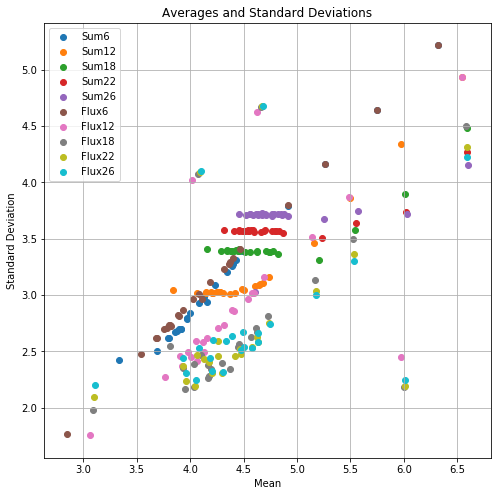

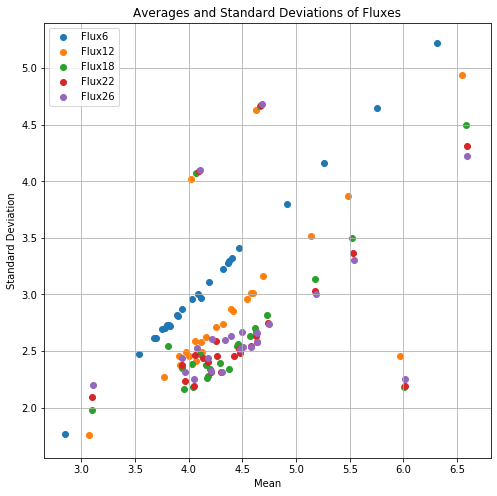

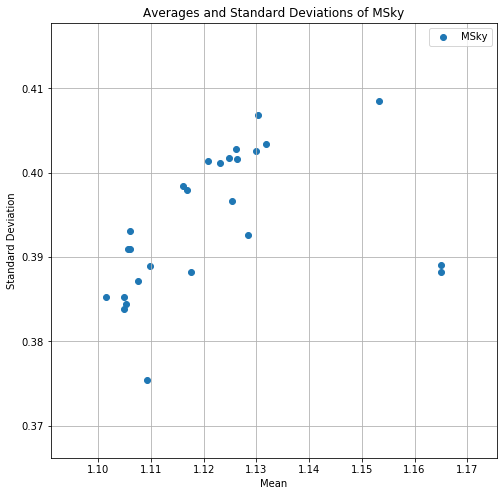

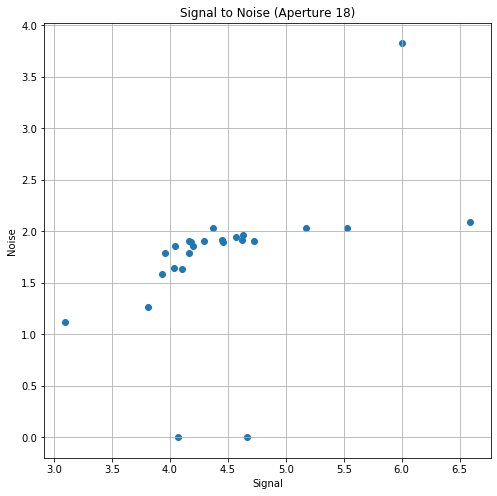

In [7]:
#Plotting means vs. standard deviations
plt.figure(figsize=(8,8))
plt.title("Averages and Standard Deviations")
plt.scatter(log10(meansum6),log10(stdsum6),label='Sum6')
plt.scatter(log10(meansum12),log10(stdsum12),label='Sum12')
plt.scatter(log10(meansum18),log10(stdsum18),label='Sum18')
plt.scatter(log10(meansum22),log10(stdsum22),label='Sum22')
plt.scatter(log10(meansum26),log10(stdsum26),label='Sum26')
plt.scatter(log10(meanflux6),log10(stdflux6),label='Flux6')
plt.scatter(log10(meanflux12),log10(stdflux12),label='Flux12')
plt.scatter(log10(meanflux18),log10(stdflux18),label='Flux18')
plt.scatter(log10(meanflux22),log10(stdflux22),label='Flux22')
plt.scatter(log10(meanflux26),log10(stdflux26),label='Flux26')
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid()

plt.figure(figsize=(8,8))
plt.title("Averages and Standard Deviations of Fluxes")
plt.scatter(log10(meanflux6),log10(stdflux6),label='Flux6')
plt.scatter(log10(meanflux12),log10(stdflux12),label='Flux12')
plt.scatter(log10(meanflux18),log10(stdflux18),label='Flux18')
plt.scatter(log10(meanflux22),log10(stdflux22),label='Flux22')
plt.scatter(log10(meanflux26),log10(stdflux26),label='Flux26')
plt.ylabel('Standard Deviation')
plt.xlabel('Mean')
plt.legend()
plt.grid()

plt.figure(figsize=(8,8))
plt.title('Averages and Standard Deviations of MSky')
plt.scatter(log10(meanmsky),log10(stdmsky),label='MSky')
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid()

plt.figure(figsize=(8,8))
plt.title("Signal to Noise (Aperture 18)")
meanstd18 = np.array(meanflux18) / np.array(stdflux18)
plt.scatter(log10(meanflux18),log10(meanstd18))
plt.grid()
plt.xlabel("Signal")
plt.ylabel("Noise")

Aperture 18 is a good aperture to choose.

V - (V-R) = Rmag

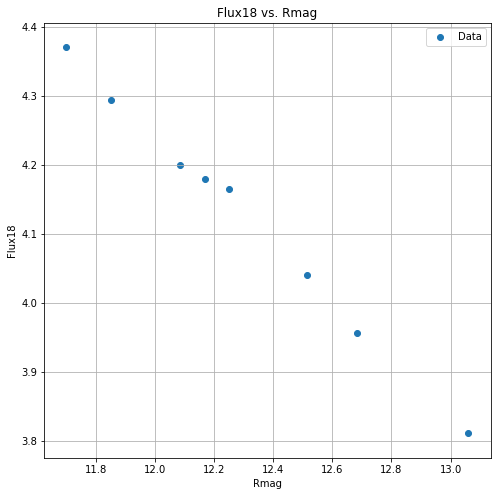

In [28]:
#13.531 Rmag and np.mean(star14flux18)
#11.0059 and np.mean(star15flux18)
#11.136 and np.mean(star16flux18)
#11.231 and np.mean(star22flux18)
#11.166 and np.mean(star23flux18)
#12.46 and np.mean(star20flux18)
#10.8672 and np.mean(star13flux18)
#12.503 and np.mean(star19flux18)
#13.074 and np.mean(star21flux18)
#12.834 and np.mean(star18flux18)
#11.524 and np.mean(star24flux18)
#11.61 and np.mean(star12flux18)
Rmag = (12.514,11.7011,12.1691,11.851,13.06,12.084,12.683,12.25)
flux18 = (np.mean(star2flux18),np.mean(star6flux18),np.mean(star7flux18),np.mean(star8flux18),np.mean(star9flux18),np.mean(star10flux18),np.mean(star11flux18),np.mean(star17flux18))
logflux18 = log10(flux18)
plt.figure(figsize=(8,8))
plt.title('Flux18 vs. Rmag')
plt.scatter(Rmag,logflux18,label='Data')
plt.xlabel('Rmag')
plt.ylabel('Flux18')
plt.grid()
plt.legend()
plt.show()

In [9]:
#Linear regression fit to obtain slope and y-intercept
fit = np.polyfit(Rmag,logflux18,1)

print("The fit coefficients are:",fit)
print("log10 values of flux are:",logflux18)
print("Rmag values are:",Rmag)

The fit coefficients are: [-0.40835391  9.14540331]
log10 values of flux are: [4.04082441 4.37046    4.18014811 4.29488446 3.81060727 4.19942262
 3.95627316 4.16443475]
Rmag values are: (12.514, 11.7011, 12.1691, 11.851, 13.06, 12.084, 12.683, 12.25)


log10(flux) = -0.4 Rmag + c where c is a constant

In [10]:
#Residual values
residual = np.array(logflux18 +(0.40835391*np.asarray(Rmag) - 9.14540331))

print("The residual values are:",residual)

The residual values are: [ 0.00556193  0.00324662  0.00404436 -0.01111667 -0.00169397 -0.01143204
 -0.00997751  0.02136684]


In [11]:
#This represents the error in residuals
sigmares = np.sqrt((np.mean(residual**2)))

sigmares #Anything outside of 2sigmares then it is a "bad" point
print("The sigma of residuals is:",sigmares)

The sigma of residuals is: 0.01043471543748969


In [12]:
meanmean = np.mean(meanmsky) #msky is 17.87

print("The mean of MSky is:",meanmean) #In DU/pixel

mskyarc = meanmean/(0.435**2) #in arcsecond^2

print("The MSky in arcseconds^2 is:",mskyarc)

skybrightness = (log10(mskyarc)-9.14540331)/-0.40835391

print("The sky brightness is:",skybrightness)

meanskybrightness = np.mean(skybrightness)

print("The mean of the sky brightness is:",meanskybrightness)

The mean of MSky is: 13.242237936298077
The MSky in arcseconds^2 is: 69.98143974790898
The sky brightness is: 17.87767977267137
The mean of the sky brightness is: 17.87767977267137


In [13]:
flux20 = 10**((-0.40835391*20)+9.14540331)

print("The flux20 is:",flux20) #per 2-second exposure

gainflux20 = (flux20/2)*3 #photons/sec for flux20 star

print("The gain of flux20 is:",gainflux20)

The flux20 is: 9.513166765906558
The gain of flux20 is: 14.269750148859837


S/N = at/sqrt(at+bt+c)

In [14]:
#Victoria
area = 1018.5 #pixels for aperture = 18
gain = 3.01
a = gainflux20
b = ((meanmean/2)*3)*area
c = ((1.42*3)**2)*area #Du

In [15]:
vals = [10,20,50,100]
t = sympy.Symbol('t')
sols = []
for val in vals:
    SN = (a*t)/((((a+b)*t)+c)**0.5)-val
    sol = sympy.solve(SN,t)
    sols.append(sol)
    print("The exposure time for S/N of",val,"is:",round(sol[0],2),"seconds ~",round(sol[0]/3600,2),"hours")

The exposure time for S/N of 10 is: 9943.22 seconds ~ 2.76 hours
The exposure time for S/N of 20 is: 39770.14 seconds ~ 11.05 hours
The exposure time for S/N of 50 is: 248558.58 seconds ~ 69.04 hours
The exposure time for S/N of 100 is: 994231.60 seconds ~ 276.18 hours


In [16]:
#Dark site
area = 1018.5
gain = 3.01
a = gainflux20
c = ((meanmean/2)*3)*area
meanmean22 = ((10**(22.5*(-0.40835391)+9.14540331))*(0.435**2))
bd = ((meanmean22/2)*3)*area

vals = [10,20,50,100]
t = sympy.Symbol('t')
sols = []

for val in vals:
    SN = (a*t)/((((a+bd)*t)+c)**0.5)-val
    sol = sympy.solve(SN,t)
    sols.append(sol)
    print("The exposure time for S/N of",val,"is:",round(sol[0],2),"seconds ~",round(sol[0]/3600,2),"hours")

The exposure time for S/N of 10 is: 188.45 seconds ~ 0.05 hours
The exposure time for S/N of 20 is: 608.24 seconds ~ 0.17 hours
The exposure time for S/N of 50 is: 3464.83 seconds ~ 0.96 hours
The exposure time for S/N of 100 is: 13645.37 seconds ~ 3.79 hours


In [25]:
#Calculate the flux value for S/N = 100 and t = 600 sec
t = 600
val = 100
a = sympy.Symbol('a')

#Victoria
area = 1018.5 #pixels
gain = 3.01
b = ((meanmean/2)*3)*area
c = ((1.42*3)**2)*area #Du
SNqq = (a*t)/((((a+b)*t)+c)**0.5)-val
solss = sympy.solve(SNqq,a)
print(solss)

fluxx = (((log10(589.507449883129*(2/3)))-9.14540331)/-0.40835391)
print("The Rmag for Victoria is:",fluxx,"which is the faintest star that can be observed in Victoria")

[589.507449883129]
The Rmag for Victoria is: 16.042469805679346 which is the faintest star that can be observed in Victoria


In [24]:
#Calculate the flux value for S/N = 100 and t = 600 sec
t = 600
val = 100
a = sympy.Symbol('a')

#Dark site
area = 1018.5
gain = 3.01
c = ((meanmean/2)*3)*area
meanmean22 = ((10**(22.5*(-0.40835391)+9.14540331))*(0.435**2))
bd = ((meanmean22/2)*3)*area
SNqqd = (a*t)/((((a+bd)*t)+c)**0.5)-val
solssd = sympy.solve(SNqqd,a)
print(solssd)

fluxxd = (((log10(79.0425031404673*(2/3)))-9.14540331)/-0.40835391)
print("The Rmag for dark site is:",fluxxd,"which is the faintest star that can be observed at a dark site")

[79.0425031404673]
The Rmag for dark site is: 18.17941178498126 which is the faintest star that can be observed at a dark site


In [19]:
Rmag

(12.514, 11.7011, 12.1691, 11.851, 13.06, 12.084, 12.683, 12.25)

In [20]:
flux18

(10985.6159375,
 23467.1309375,
 15140.775,
 19718.98046875,
 6465.57675,
 15827.8753125,
 9042.180171875,
 14602.75328125)

In [23]:
#First principle
n = 0
m = np.array(Rmag)
ln = (1000 * 2 * np.pi*(40**2) * 1500)/3
lm = ln * (10**((m-n)/-2.5))
print("The flux in DU is:",lm)

ratio = flux18/lm
print("\nComparing the two fluxes:",ratio)

print("\nWe are getting ~20% of the signal")

The flux in DU is: [ 49621.49622954 104913.13272892  68175.73917551  91383.935099
  30010.26672425  73734.34987108  42468.78685994  63280.49320176]

Comparing the two fluxes: [0.22138824 0.22368154 0.2220845  0.2157817  0.21544549 0.21466081
 0.21291355 0.23076232]

We are getting ~20% of the signal
